# Installing Dependencies

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install scipy
%pip install seaborn

# Ex 1.

Compare the performance of a $kNN$ with $k = 5$ and a naïve Bayes with Gaussian \
assumption (consider all remaining parameters as default):

### a)
Plot two boxplots with the fold accuracies for each classifier. Is there one \
more stable than the other regarding performance? Why do you think that is the \
case? Explain. 
> (**Refer to the report for the explanation**)

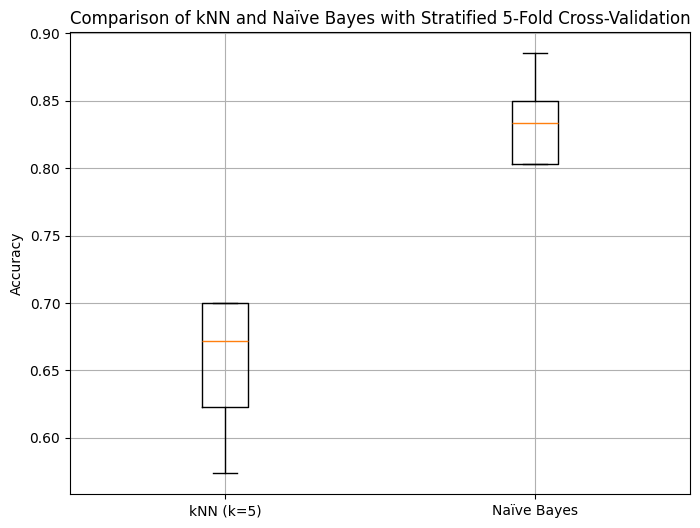

In [15]:
# Code for a
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('heart-disease.csv')

X = data.drop('target', axis=1) # Features without the target variable
y = data['target'] # Target variable

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

# Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Fold Accuracies
knn_accuracies = cross_val_score(knn, X, y, cv=skf)
nb_accuracies = cross_val_score(nb, X, y, cv=skf)

plt.figure(figsize=(8, 6))
plt.boxplot([knn_accuracies, nb_accuracies], tick_labels=['kNN (k=5)', 'Naïve Bayes'])
plt.ylabel('Accuracy')
plt.title('Comparison of kNN and Naïve Bayes with Stratified 5-Fold Cross-Validation')
plt.grid(True)
plt.show()



### b)
Report the accuracy of both models, this time scaling the data with a \
Min-Max scaler before training the models. Explain the impact that this \
preprocessing step has on the performance of each model, providing an \
explanation for the results. 
> (**Refer to the report for the explanation**)

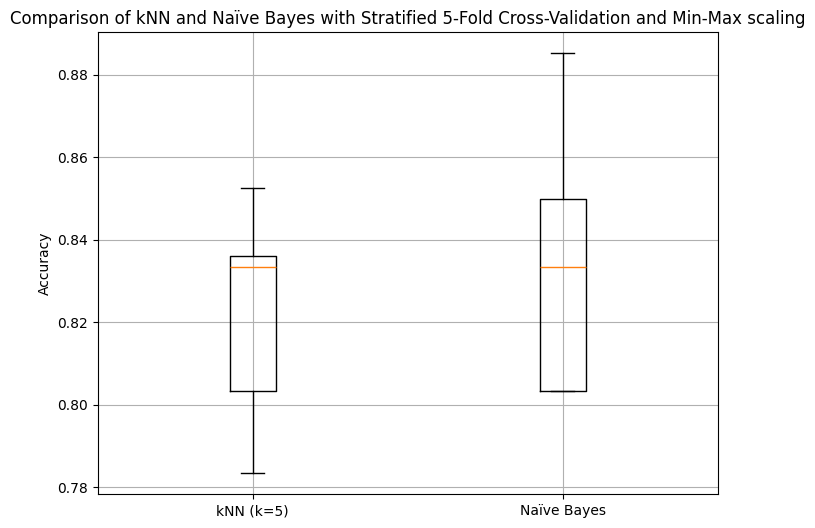

In [16]:
# Code for b)
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)

# Perform cross-validation with scaled data
knn_accuracies_scaled = cross_val_score(knn, X_scaled, y, cv=skf)
nb_accuracies_scaled = cross_val_score(nb, X_scaled, y, cv=skf)

# Plot the new accuracies
plt.figure(figsize=(8, 6))
plt.boxplot([knn_accuracies_scaled, nb_accuracies_scaled], tick_labels=['kNN (k=5)', 'Naïve Bayes'])
plt.ylabel('Accuracy')
plt.title('Comparison of kNN and Naïve Bayes with Stratified 5-Fold Cross-Validation and Min-Max scaling')
plt.grid(True)
plt.show()


### c)
Using `scipy`, test the hypothesis “the $kNN$ model is statistically superior to \
naïve Bayes regarding accuracy”, asserting whether it is true.
> (**Refer to the report for the explanation**)

In [17]:
# Code for c)
from scipy.stats import ttest_rel
# Perform paired t-test
t_statistic, p_value = ttest_rel(knn_accuracies, nb_accuracies)

print("Paired t-test results:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. kNN is statistically different from Naive Bayes.")
    if np.mean(knn_accuracies) > np.mean(nb_accuracies):
        print("kNN is statistically superior to Naive Bayes.")
    else:
        print("Naive Bayes is statistically superior to kNN.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that kNN is statistically different from Naive Bayes.")

Paired t-test results:
t-statistic: -6.690315237001677
p-value: 0.0025959625559720425
Reject the null hypothesis. kNN is statistically different from Naive Bayes.
Naive Bayes is statistically superior to kNN.


# Ex 2.
Using a 80-20 train-test split, vary the number of neighbors of a $kNN$ classifier using \
$k = \{1, 5, 10, 20, 30\}$. Additionally, for each $k$, train one classifier using uniform weights \
and distance weights.

### a)
Plot the train and test accuracy for each model

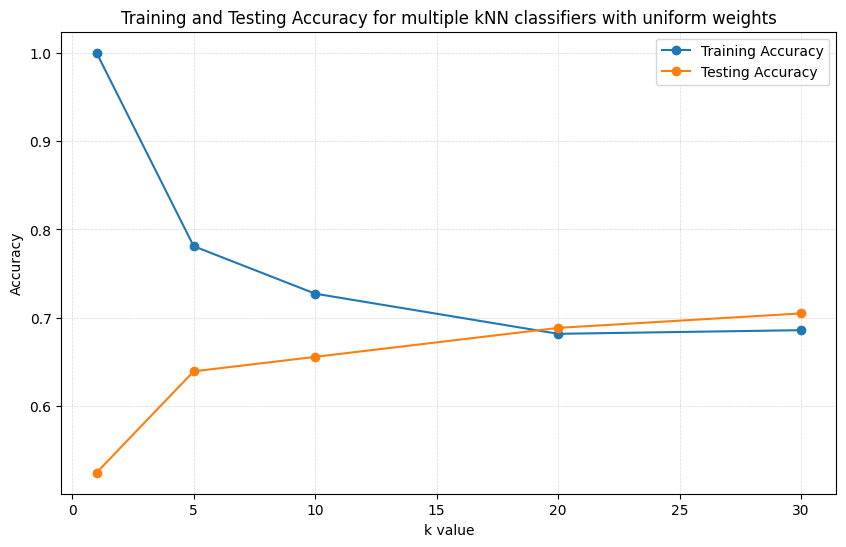

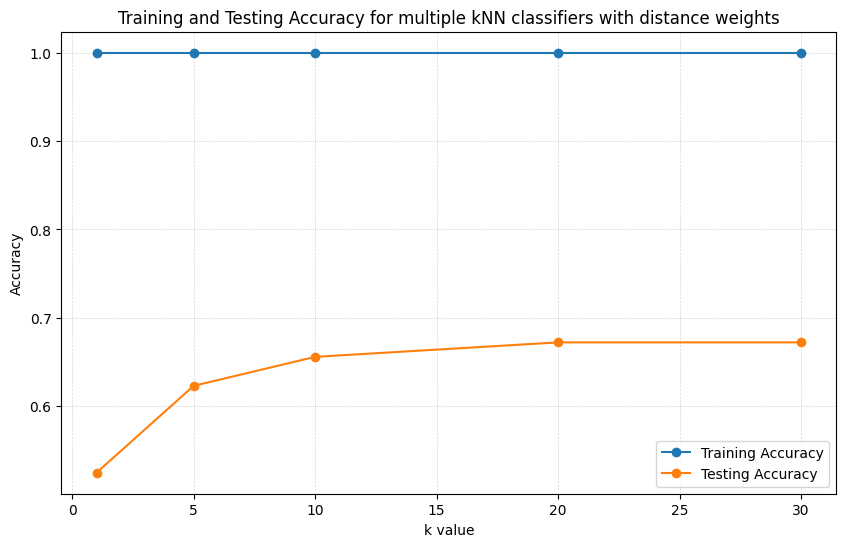

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


# Create dataframe from heart-disease.csv
df = pd.read_csv('./heart-disease.csv', sep=',')

X = df.drop('target', axis=1) # Input variables
y = df['target'] # Target variable

# Split dataset into a 80-20 training set
X_train, X_test, y_train, y_test = train_test_split(X.values, y, train_size=0.8, random_state=0)

k_values = [1, 5, 10, 20, 30]
uni_weights_train_accuracies = []
dist_weights_train_accuracies = []

uni_weights_test_accuracies = []
dist_weights_test_accuracies = []

for k in k_values:
    # Create classifiers: Uniform weights and Distance weights
    uni_weights_clf = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    dist_weights_clf = KNeighborsClassifier(n_neighbors=k, weights='distance')

    uni_weights_clf.fit(X_train, y_train)
    dist_weights_clf.fit(X_train, y_train)

    # Calculate training accuracy
    uni_weights_train_accuracies.append(accuracy_score(y_train, uni_weights_clf.predict(X_train)))
    dist_weights_train_accuracies.append(accuracy_score(y_train, dist_weights_clf.predict(X_train)))

    # Calculate testing accuracy
    uni_weights_test_accuracies.append(accuracy_score(y_test, uni_weights_clf.predict(X_test)))
    dist_weights_test_accuracies.append(accuracy_score(y_test, dist_weights_clf.predict(X_test)))

# Plot the figures
plt.figure(figsize=(10, 6))
plt.plot(k_values, uni_weights_train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, uni_weights_test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Training and Testing Accuracy for multiple kNN classifiers with uniform weights')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, dist_weights_train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, dist_weights_test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Training and Testing Accuracy for multiple kNN classifiers with distance weights')
plt.show()

### b)
Explain the impact of increasing the neighbors on the generalization ability of \
the models.
> (**Refer to the report for the explanation**)

# Ex 3.
Considering the unique properties of the `heart-disease.csv` dataset, identify two
possible difficulties of the naïve Bayes model used in the previous exercises when learning
from the given dataset.
> (**Refer to the report for the explanation**)

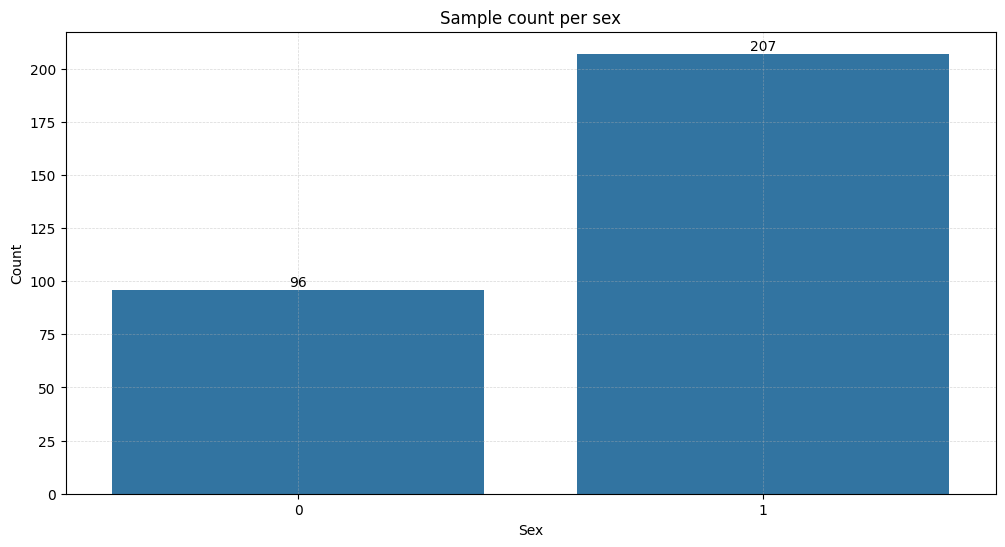

In [19]:
# Countplot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

df = pd.read_csv('./heart-disease.csv', sep=',')

# SEX: Count Plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='sex')
plt.title('Sample count per sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

